# OpenCV

## Topics
1. [Loading images](#1.-Loading-images)

## References
* [OpenCV Python Tutorials](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html)
* [OpenCV Guide by PyImageSearch](https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/)
* [Book: Chapter 8](https://github.com/abhi3700/My_Learning_AI/blob/master/books/Machine%20Learning%20with%20Python%20Cookbook_%20Practical%20Solutions%20from%20Preprocessing%20to%20Deep%20Learning%20(%20PDFDrive%20).pdf)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## 1. Loading images

In [2]:
# img = cv2.imread("data/plane.jpg")
img = cv2.imread("data/plane.jpg", cv2.IMREAD_GRAYSCALE)

In [3]:
# show image
cv2.imshow("Output", img)
# cv2.waitKey()          # window open for infinite time
cv2.waitKey(10000)        # window open for 10000 ms i.e. 10s
cv2.destroyAllWindows()   # destroy opened windows

In [4]:
# get the dimensions: height, width, depth of image
# h, w, d = img.shape
# h, w, d
h, w = img.shape
h, w

(2270, 3600)

In [5]:
# show opencv version
cv2.__version__

'4.0.1'

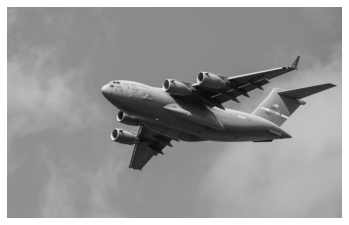

In [6]:
# show image using matplotlib
plt.imshow(img, cmap="gray"), plt.axis("off")
plt.show()

__Discussion__

In [7]:
# show data type
type(img)

numpy.ndarray

In [8]:
# show actual values of the image matrix
img

array([[140, 136, 146, ..., 132, 139, 134],
       [144, 136, 149, ..., 142, 124, 126],
       [152, 139, 144, ..., 121, 127, 134],
       ...,
       [156, 146, 144, ..., 157, 154, 151],
       [146, 150, 147, ..., 156, 158, 157],
       [143, 138, 147, ..., 156, 157, 157]], dtype=uint8)

In [9]:
# get the resolution/dimension of the image
img.shape

(2270, 3600)

In [10]:
# get the top-right most pixel value
img[0, 0]

140

> In Grayscale, the pixel's intensity values can range from black to white

In [11]:
# get the pixel value in RGB

# load the image in color
img_bgr = cv2.imread('data/plane.jpg', cv2.IMREAD_COLOR)

img_bgr[0, 0]

array([195, 144, 111], dtype=uint8)

> In OpenCV, the image is in BGR by default, but many image application using matplotlib uses RGB

In [12]:
# Convert to RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

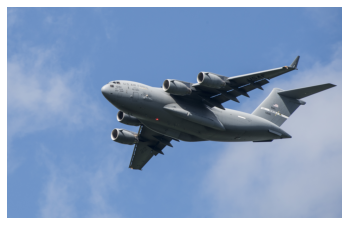

In [13]:
# show image using matplotlib
plt.imshow(img_rgb), plt.axis("off")
plt.show()

__Q.__ Why OpenCV Using BGR Colour Space Instead of RGB?

- OpenCV reads in images in BGR format (instead of RGB) because when OpenCV was first being developed, BGR color format was popular among camera manufacturers and image software providers. The red channel was considered one of the least important color channels, so was listed last, and many bitmaps use BGR format for image storage. However, now the standard has changed and most image software and cameras use RGB format, which is why, in programs, it's good practice to initially convert BGR images to RGB before analyzing or manipulating any images.

## 2. Saving images


In [14]:
# load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [15]:
# convert image to grayscale
img_gray = cv2.imread("data/plane.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imwrite("data/plane_gray.jpg", img_gray)

True

> NOTE: `imwrite` will overwrite existing files without outputting an error or asking for confirmation

## 3. Resizing images

In [16]:
# load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [17]:
# load image in grayscale
img = cv2.imread('data/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

In [18]:
# resize image to 50 pixels by 50 pixels
img_50x50 = cv2.resize(img, (50, 50))

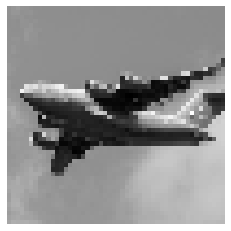

In [19]:
plt.imshow(img_50x50, cmap="gray"), plt.axis("off")
plt.show()

Salient points
* Resizing images is a common task in image preprocessing for 2 reasons:
    - to use as features, images must have same dimensions. This will reduce the intensity/information of each pixel when resized
    - ML can require thousands or hundreds of thousands of images. When those images are very large, they have a huge memory capacity, but by resizing, reduces the memory usage.
    
> Some common sizes are 32 x 32, 64 x 64, 96 x 96, 256 x 256

## 4. Crop images

In [20]:
# load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [21]:
# load image in grayscale
img = cv2.imread('data/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

In [22]:
# select first half of the columns and all rows
img_cropped = img[:,:128]

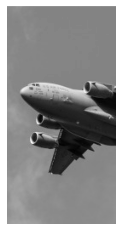

In [23]:
plt.imshow(img_cropped, cmap='gray'), plt.axis("off")
plt.show()

> Cropping can be particularly useful if we know that we only want to keep a certain part of every image.

For example, if our images come from a stationary security camera we can crop all
the images so they only contain the area of interest.

## 5. Blur images

To blur an image, each pixel is transformed to be the average value of its neighbors.
This neighbor and the operation performed are mathematically represented as a kernel
(don’t worry if you don’t know what a kernel is). The size of this kernel determines
the amount of blurring, with larger kernels producing smoother images. Here
we blur an image by averaging the values of a 5 × 5 kernel around each pixel:

In [24]:
# load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [25]:
# load image in grayscale
img = cv2.imread('data/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

In [33]:
# blur image
img_blurry = cv2.blur(img, (5, 5))

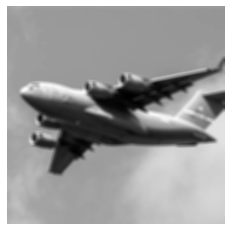

In [34]:
plt.imshow(img_blurry, cmap="gray"), plt.axis("off")
plt.show()

Now, the kernel size is increased from (5, 5) to (100, 100)

In [35]:
# blur image
img_very_blurry = cv2.blur(img, (100, 100))

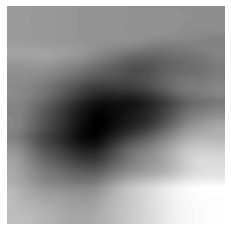

In [36]:
plt.imshow(img_very_blurry, cmap="gray"), plt.axis("off")
plt.show()

> The blur kernel de-emphasizes differences in adjacent pixel values.

__Discussion__
* Kernels are widely used in image processing to do everything from sharpening to edge detection

In [39]:
kernel = np.ones((5, 5))/25
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

* The center element in the kernel is the pixel being examined, while the remaining elements are its neighbors.
* Since all elements have the same value (normalized to add up to 1), each has an equal say in the resulting value of the pixel of interest. We can manually apply a kernel to an image using filter2D to produce a similar blurring effect:

In [40]:
# apply kernel
img_kernel = cv2.filter2D(img, -1, kernel)

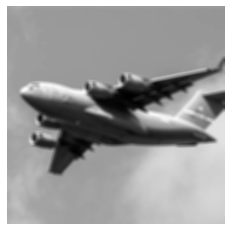

In [41]:
# show image
plt.imshow(img_kernel, cmap="gray"), plt.axis("off")
plt.show()

## 6. Sharpening images
* Sharpening works similarly to blurring, except instead of using a kernel to average the neighboring values, we constructed a kernel to highlight the pixel itself. The resulting effect makes contrasts in edges stand out more in the image.
* Create a kernel that highlights the target pixel. Then apply it to the image using filter2D:

In [42]:
# load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [43]:
# load image in grayscale
img = cv2.imread('data/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

In [44]:
# create kernel
kernel = np.array([[0, -1, 0],
                  [-1, 5, -1],
                  [0, -1, 0]])

In [46]:
# sharpen image
img_sharp = cv2.filter2D(img, -1, kernel)

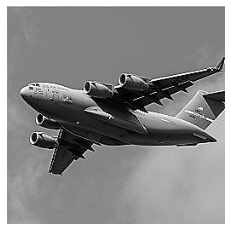

In [47]:
plt.imshow(img_sharp, cmap="gray"), plt.axis("off")
plt.show()

## 7. Enhancing Contrast

* <u>Aim:</u> increase the contrast between pixels in an image.
* __Histogram equalization__ is a tool for image processing that can make objects and shapes stand out. It transforms the image so that it uses wider range of pixel intensities. 
* Use `equalizeHist` method of opencv lib

In [48]:
# load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [49]:
# load image in grayscale
img = cv2.imread('data/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

In [51]:
# Enhance image
img_enhanced = cv2.equalizeHist(img)

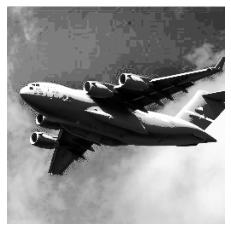

In [52]:
plt.imshow(img_enhanced, cmap="gray"), plt.axis("off")
plt.show()

* Image (in GRAY) -> `equalizeHist()` -> enhanced image (in GRAY)
  - Here, both the input & output images are in GRAYSCALE
* Image (in color i.e. RGB) -> convert from BGR to YUV -> `equalizeHist()` -> convert from YUV to RGB -> enhanced image (in color i.e. RGB)
  - image is read as BGR
  - Here, both the input & output images are in RGB

In [54]:
# load colored image
img_bgr = cv2.imread('data/plane_256x256.jpg')

In [55]:
# convert from BGR to YUV
img_yuv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2YUV)

In [56]:
# Apply histogram equalization
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

In [58]:
# convert from YUV to RGB
img_rgb = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

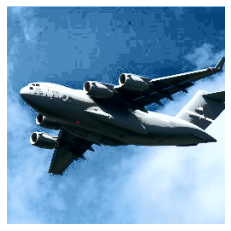

In [59]:
plt.imshow(img_rgb), plt.axis("off")
plt.show()

__Discussion__
* While the resulting image often does not look “realistic,” we need to remember that the image is just a visual representation of the underlying data. If histogram equalization is able to make objects of interest more distinguishable from other objects or backgrounds (which is not always the case), then it can be a valuable addition to our image preprocessing pipeline.

## 8. Isolating colors
* <u>Aim</u>: isolate a color in an image
* <u>Steps</u>:
  - Convert to HSV (hue, saturation, and value)
  - Define a range of colors | probably the most difficult and time-consuming part.
  - apply a mask to the image

In [60]:
# load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [61]:
# load image
img_bgr = cv2.imread("data/plane_256x256.jpg")

In [64]:
# convert from BGR to HSV
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

In [67]:
# define range of blue values in HSV
lower_blue = np.array([50, 100, 50])
upper_blue = np.array([130, 255,255])

In [84]:
# Create mask
mask = cv2.inRange(img_hsv, lower_blue, upper_blue)
mask.size

65536

In [69]:
# mask image
img_bgr_masked = cv2.bitwise_and(img_bgr, img_bgr, mask=mask)

In [70]:
# convert BGR to RGB
img_rgb = cv2.cvtColor(img_bgr_masked, cv2.COLOR_BGR2RGB)

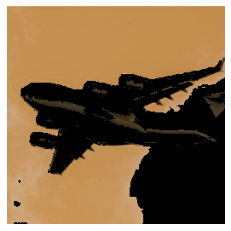

In [78]:
# show masked image
plt.imshow(img_bgr_masked), plt.axis("off")
plt.show()

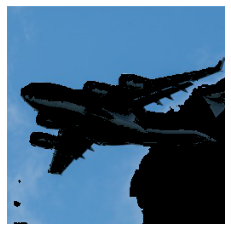

In [85]:
# show RGB image
plt.imshow(img_rgb), plt.axis("off")
plt.show()

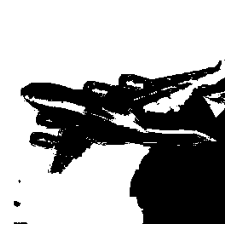

In [88]:
# show mask
plt.imshow(mask, cmap="gray"), plt.axis("off")
plt.show()